<h1 style="text-align: center;">TITANIC SURVIVAL PREDICTION </h1>

## Table of Contents
Introduction<br>
Objective<br>
1. Exploratory Data Analysis<br>
    1.1. Data Loading<br>
    1.2 Data Cleaning and Preprocessing<br>
    1.2.1 Checking for Duplicates<br>
    1.2.2 Removing Irrelevant Variables<br>
    1.2.3 Missing Value Handling<br>
    1.3 Analysis by Visualization<br>
2. Modeling<br>
    2.1 Train-Test Split<br>
    2.2 Classification<br>
    2.2.1  Logistic Regression<br>
    2.2.2 Decision Tree Classifier<br>
    2.2.3 Random Forest Classifier<br>
    2.2.4 Gradient Boost Classifier<br>
    2.2.5 Support Vector Machine Classifier<br>
3. Model Evaluation and Selection<br>
4. Conclusion


## Introduction :

**The goal of this project is to develop a machine learning model to predict the survival of Titanic passengers based on features like age, gender, ticket class, fare, and cabin.**

**The Titanic disaster is one of the most infamous shipwrecks ever recorded. On April 15, 1912, the RMS Titanic sank during its inaugural voyage, leading to the deaths of 1,502 out of 2,224 passengers. This project leverages a dataset containing passenger information to predict their likelihood of survival.**


## Objective : 

1. Analyze the dataset and perform cleanup.
2. Develop a robust classification model to predict passenger survival.

In [105]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()
import warnings 
warnings.filterwarnings("ignore")

In [106]:
# iimporting machine learning classification Libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
os.getcwd()

'C:\\Users\\Shashank Rawat'

In [6]:
os.chdir("D:\Data Science\CodeSoft")

## 1. Exploratory Data Analysis

### 1.1 Data Loading:

We begin by loading the dataset and showing the first few rows to gain an initial insight into the data.

In [107]:
# Importing Dataset from the local system.
df= pd.read_csv('Titanic-Dataset.csv')
# creating Copy of dataset
df1=df.copy()

In [108]:
# First 5 rows of the dataset.
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# All the coloumns in the dataset
print("Name of all the Variables: ")
print(df1.columns)

Name of all the Variables: 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
# Size the dataset
df1.size

10692

In [11]:
# Shape of the Dataset
df1.shape

(891, 12)

In [16]:
# Basic Information in the Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<b>This dataset contains the following columns :</b>

1. PassengerId: Unique identifier for each passenger
2. Survived: Survival indicator (0 = No, 1 = Yes)
3. Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
4. Name: Passenger name
5. Sex: Gender
6. Age: Age
7. SibSp: Number of siblings/spouses aboard
8. Parch: Number of parents/children aboard
9. Ticket: Ticket number
10. Fare: Passenger fare
11. Cabin: Cabin number
12. Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [12]:
Total_death= 1502
Total_passenger= 2204
print("Percecntage of survivors: {:.2%}".format((Total_passenger-Total_death)/Total_passenger))

Percecntage of survivors: 31.85%


In [13]:
# Sample Size
Sample_size=  "{:.2%}".format((df1.shape[0]/2204))
print("Sample Size: ",Sample_size)

Sample Size:  40.43%


In [14]:
Survived_sample=(df1['Survived']==1).sum()
print("Percentage of Survivor in Sample Data: {:.2%}".format((Survived_sample/df1.shape[0])))

Percentage of Survivor in Sample Data: 38.38%


<b>The overall survival rate for the Titanic disaster was 31.85%. 
Our sample dataset, which includes 891 records and 12 variables, represents 40.43% of the total passengers aboard. The survival rate in this sample is 38.83%, indicating that the sample closely mirrors the survival rate of the entire dataset.</b>

In [17]:
# Discription of all the numeric variable
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [18]:
df1.describe(include=[np.object, 'category']).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


## 1.2 Data Cleaning and Preprocessing
To ensure the data is clean and ready for modeling, we need to handle duplicate values, missing values and encode categorical variables.


### 1.2.1 Checking for Duplicates : 

In [22]:
duplicates = df1.duplicated()
num_duplicates = duplicates.sum()
print("Number of Duplicates in Dataset:")
print(num_duplicates)

Number of Duplicates in Dataset:
0


### 1.2.2 Removing Irrlevant Variables :

In [23]:
df1.drop(["PassengerId","Name","Cabin","Ticket"],inplace=True,axis=1)

### 1.2.3 Missing Value Handling :

In [24]:
# checking for the null values in the dataset
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Observation : 
From the output, we can see that the columns Age and Embarked have missing values.

We will fill missing Age values with the mean age,and drop rows which has missing value in variable Embarked.

In [25]:
# Filling the null value with mean value of ages.
df1['Age']= df1['Age'].fillna(df1['Age'].mean())

In [26]:
# Removing the observation with null values for the rest of the dataset
df1.dropna(axis=0,inplace=True)

In [27]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [28]:
# Imputing the value in 'Embarked' variable:
df1['Embarked']=df1["Embarked"].replace(["C","S","Q"],["Cherbourg","Southampton","Queenstown"])

In [29]:
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,Southampton
1,1,1,female,38.000000,1,0,71.2833,Cherbourg
2,1,3,female,26.000000,0,0,7.9250,Southampton
3,1,1,female,35.000000,1,0,53.1000,Southampton
4,0,3,male,35.000000,0,0,8.0500,Southampton
5,0,3,male,29.699118,0,0,8.4583,Queenstown
6,0,1,male,54.000000,0,0,51.8625,Southampton
7,0,3,male,2.000000,3,1,21.0750,Southampton
8,1,3,female,27.000000,0,2,11.1333,Southampton
9,1,2,female,14.000000,1,0,30.0708,Cherbourg


## 1.3 Analysis by Visualisation :
We will perform EDA through visualisation to understand the distribution of the data and identify important features.

In [ ]:
import matplotlib.pyplot as plt

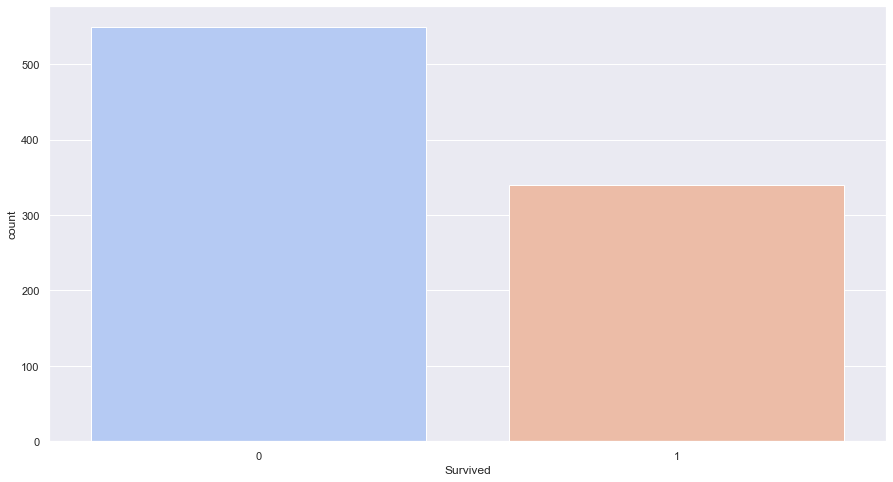

In [30]:
# Bar Plot for Survived passenger:
plt.figure(figsize=(15, 8))
sns.countplot(x="Survived",data=df1,palette="coolwarm")
plt.show()

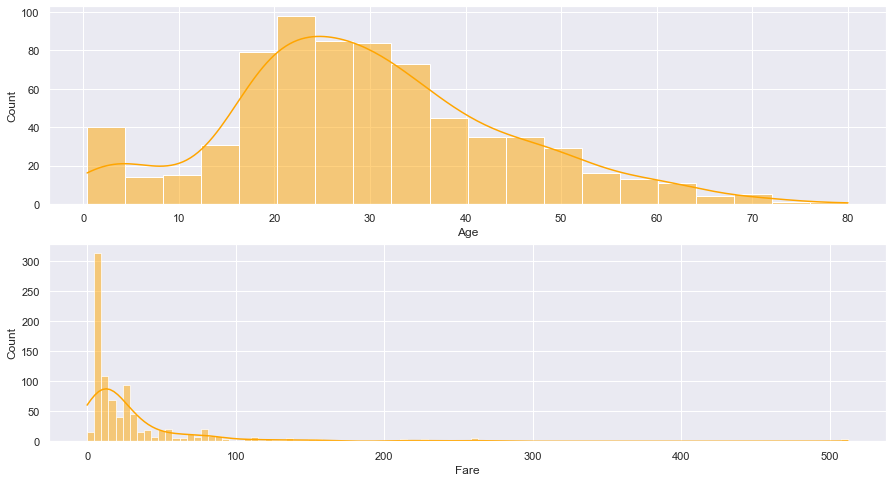

In [109]:
# Histogram plot for variable 'Age' and 'Fare' to visalise these feature's distribution.
plt.figure(figsize=(15,8))
for i,col in enumerate(['Age','Fare']):
    plt.subplot(2,1,i+1)
    sns.histplot(data=df1,x=col,kde=True,color="ORANGE")

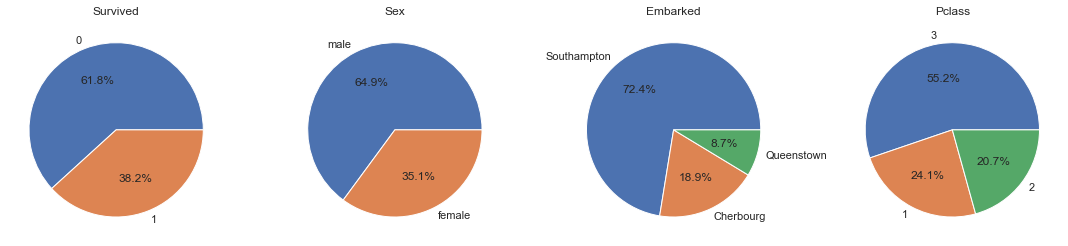

In [32]:
# Pie Chart to represt proportion proportion of categories in different variables
plt.figure(figsize=(15, 12))
for i, col in enumerate(['Survived', 'Sex', 'Embarked', 'Pclass']):
    plt.subplot(1, 4, i + 1)
    x = df1[col].value_counts().reset_index()
    x.columns = [col, 'count']  # Renaming columns for clarity
    plt.title(f"{col}")
    plt.pie(x['count'], labels=x[col], autopct="%0.1f%%")
plt.tight_layout()  .
plt.show()

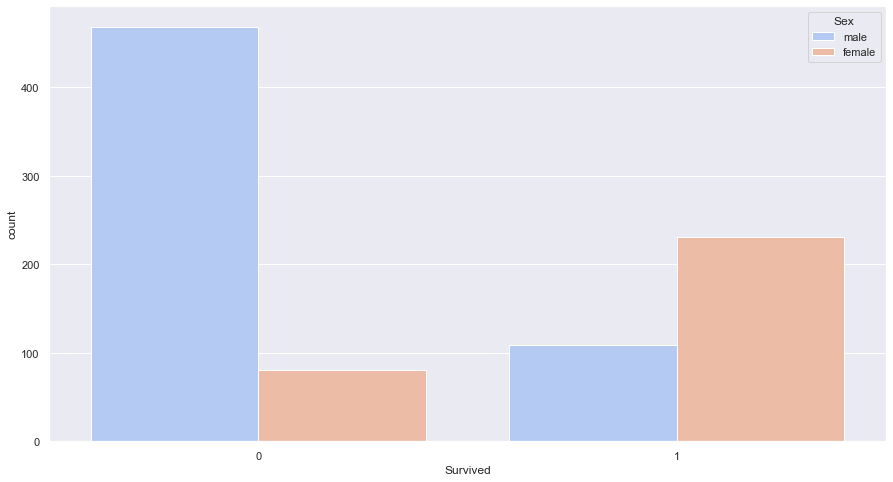

In [33]:
# Servival based on sex.
plt.figure(figsize=(15, 8))
sns.countplot(x="Survived",data=df1, hue="Sex",palette="coolwarm")
plt.show()

<b> The plot above shows that among the survivors, there were more females than males, while in the non-survivors, females were significantly fewer compared to males. This indicates that during the evacuation and rescue operations, females were given priority, which aligns with the established procedures.</b>

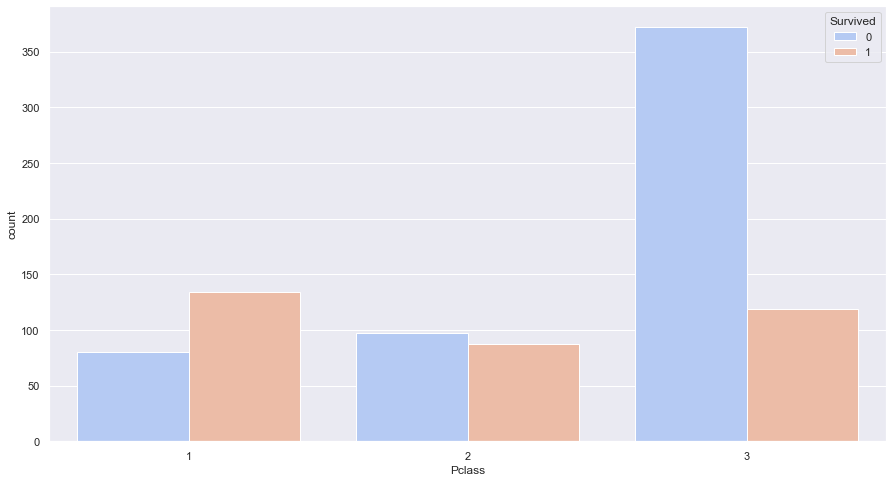

In [34]:
plt.figure(figsize=(15, 8))
sns.countplot(x="Pclass",data=df1, hue="Survived",palette="coolwarm")
plt.show()

<b> The plot above illustrates that passengers with third-class tickets experienced the highest fatality rate. This is because there were more third-class passengers compared to those with tickets from the other two classes. However, the survival rate does not vary significantly by ticket class, as a similar number of passengers were saved across all classes.</b>

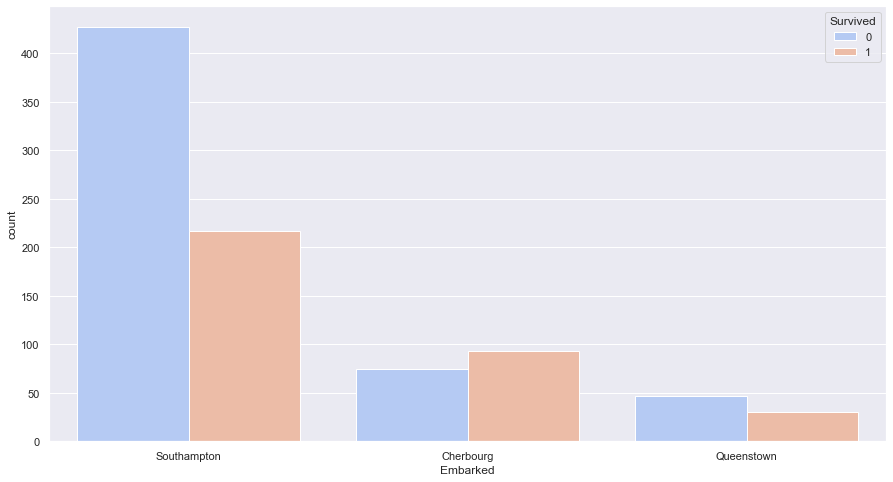

In [35]:
plt.figure(figsize=(15, 8))
sns.countplot(x="Embarked",data=df1, hue="Survived",palette="coolwarm")
plt.show()

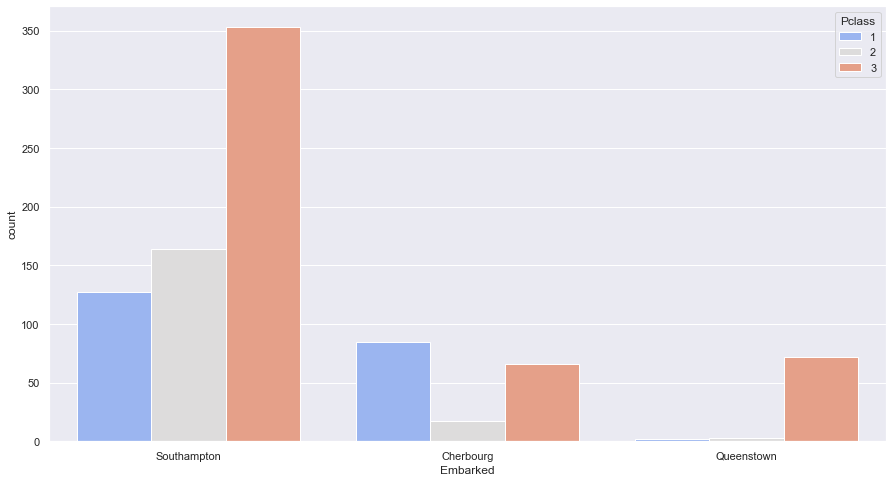

In [36]:
plt.figure(figsize=(15, 8))
sns.countplot(x="Embarked",data=df1, hue="Pclass",palette="coolwarm")
plt.show()

<b> Most of the passengers on the Titanic boarded the ship from Southampton. </b>

Text(0.5, 0, 'No. of siblings / spouses')

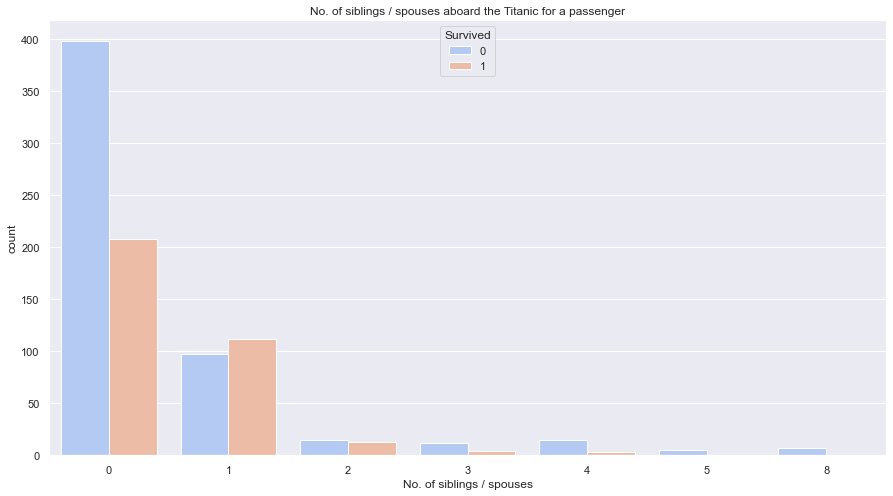

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(data=df1,x="SibSp",hue='Survived',palette='coolwarm')
plt.title("No. of siblings / spouses aboard the Titanic for a passenger")
plt.xlabel("No. of siblings / spouses")

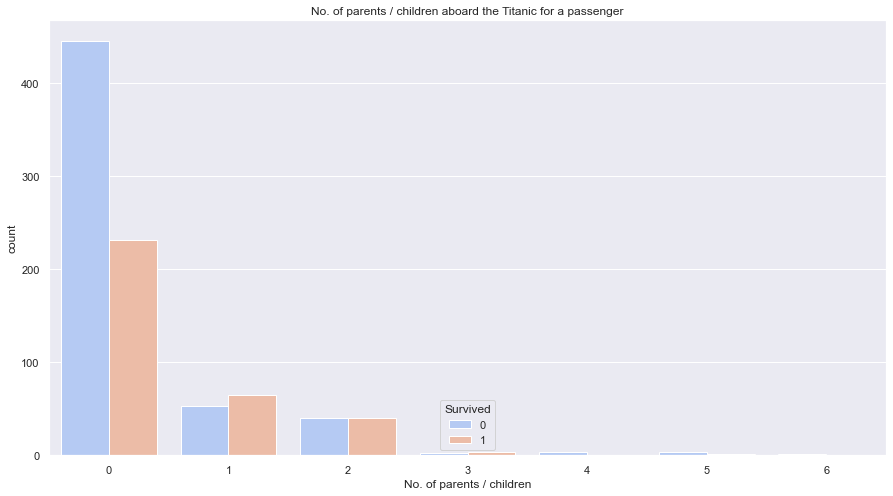

In [38]:
plt.figure(figsize=(15,8))
sns.countplot(x="Parch",data=df1,hue='Survived',palette='coolwarm')
plt.title("No. of parents / children aboard the Titanic for a passenger")
plt.xlabel("No. of parents / children")

plt.show()

### Dummies variable Creation :

In [40]:
# Creating Dummies variable and dropping first dummies.
df1 = pd.get_dummies(df1, columns=['Embarked', 'Pclass'], drop_first=True)
df1.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Queenstown,Embarked_Southampton,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,0,1,0,1
1,1,female,38.0,1,0,71.2833,0,0,0,0
2,1,female,26.0,0,0,7.9250,0,1,0,1
3,1,female,35.0,1,0,53.1000,0,1,0,0
4,0,male,35.0,0,0,8.0500,0,1,0,1


### Correlation Matrix :

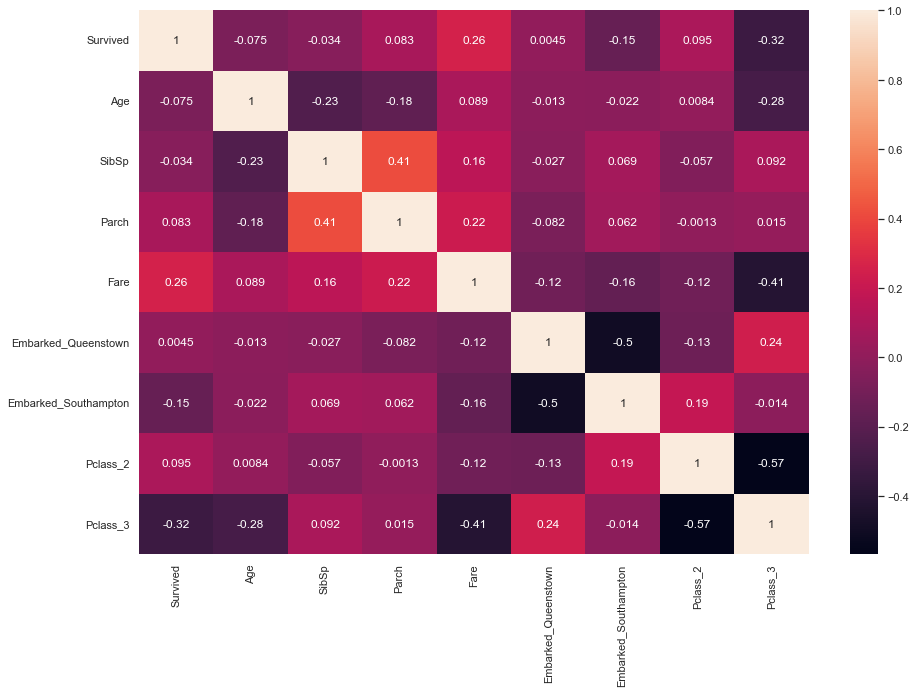

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()


<b>The Correlation Matrix graph above indicates that there is very little correlation between the independent variables, suggesting that there is no need to remove any columns based on correlation factors.</b>

In [42]:
# Replacing Male as 1 and female as 0.
df1['Sex']=df1["Sex"].replace(['male','female'],[0,1])

## 2. Modeling : 

###  2.1 Train-Test Split: 

In [43]:
X= df1.drop("Survived",axis=1)
y=df1["Survived"]

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((666, 9), (666,), (223, 9), (223,))

### 2.2 Classification : 

In [ ]:
# Importing Necessary Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [ ]:
# Importing Evalluation matrices 
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score

### 2.2.1 Logistic Regression :

In [47]:
# Training Logistic Regrssion Model.
logreg_clf = LogisticRegression(solver='liblinear')
logreg_clf.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [48]:
# Making Prediction.
log_reg_predict=logreg_clf.predict(X_test)

In [49]:
# Comparring Test value and Predicted values.
df1_LR= pd.DataFrame({"Survived":y_test,"Survivied Prediction":log_reg_predict})
df1_LR.head(10)

,Survived,Survivied Prediction
374,0,1
212,0,0
259,1,1
584,0,0
508,0,0
264,0,1
804,1,0
887,1,1
410,0,0
494,0,0


In [51]:
# Count of Actual output PREDICTED OUPUT.
cm=confusion_matrix(y_test,log_reg_predict)
print(cm)

[[121  15]
 [ 21  66]]


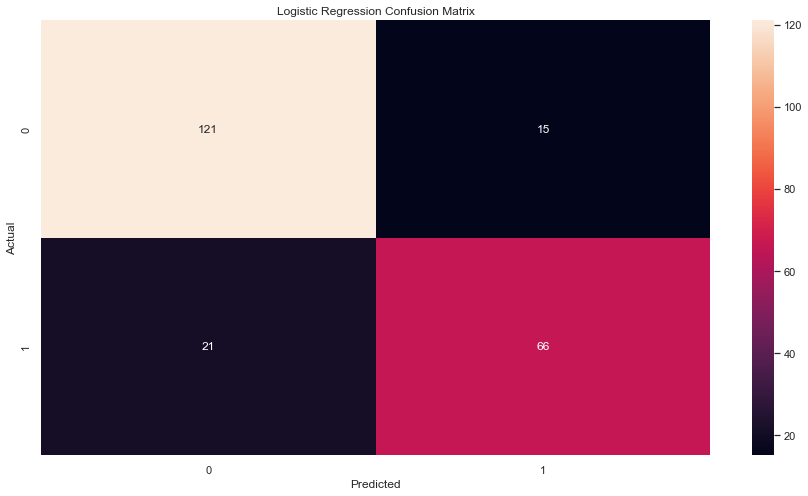

In [52]:
# confusion matrix.
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, log_reg_predict)

# Plot confusion matrix.
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
# Calculating Evaluation Scores.
Accuracy = accuracy_score(y_test,log_reg_predict)
recall=recall_score(y_test,log_reg_predict)
precision=precision_score(y_test,log_reg_predict)
f1_score_lr=f1_score(y_test,log_reg_predict)
print("Accuracy Score: ",Accuracy)
print("Recall Score: ",recall)
print("Precison Score: ",precision)
print("F1 Score: ",f1_score_lr)


Accuracy Score:  0.8385650224215246
Recall Score:  0.7586206896551724
Precison Score:  0.8148148148148148
F1 Score:  0.7857142857142857


In [54]:
# Classification report.
cr=classification_report(y_test,log_reg_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       136
           1       0.81      0.76      0.79        87

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



In [55]:
# Creating a Evaluation Dataframe that will record all evaluation scores of model implimented.
Evaluation_df=pd.DataFrame(columns=['Classifier', 'Accuracy', 'Recall Score', 'Precission','F1-Score'])

In [56]:
# Dictionary to record model Evaluation score.
logreg_clf_Eval= {'Classifier':'Logestic Regression', 'Accuracy': Accuracy, 'Recall Score': recall , 'Precission': precision,'F1-Score':f1_score_lr}

In [57]:
logreg_clf_Eval

{'Classifier': 'Logestic Regression',
 'Accuracy': 0.8385650224215246,
 'Recall Score': 0.7586206896551724,
 'Precission': 0.8148148148148148,
 'F1-Score': 0.7857142857142857}

In [58]:
# Appending model score in Evaluation Dataframe
Evaluation_df=Evaluation_df.append(logreg_clf_Eval,ignore_index= True)
Evaluation_df.head()

,Classifier,Accuracy,Recall Score,Precission,F1-Score
0,Logestic Regression,0.838565,0.758621,0.814815,0.785714


### 2.2.2 Decission Tree Classifier :

In [59]:
# Training Decision Tree Classifier Model.
dt_clf= DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
# Making Prediction.
y_pred_dt = dt_clf.predict(X_test)

In [61]:
# Comparring Test value and Predicted values.
df1_DT= pd.DataFrame({"Survived":y_test,"Survivied Prediction":y_pred_dt})
df1_DT.head(10)

,Survived,Survivied Prediction
374,0,1
212,0,0
259,1,1
584,0,0
508,0,0
264,0,1
804,1,0
887,1,1
410,0,0
494,0,0


In [62]:
# Calculating Evaluation Scores.
Accuracy = accuracy_score(y_test,y_pred_dt)
recall=recall_score(y_test,y_pred_dt)
precision=precision_score(y_test,y_pred_dt)
f1_score_dt= f1_score(y_test,y_pred_dt)
print("Accuracy Score: ",Accuracy)
print("Recall Score: ",recall)
print("Precison Score: ",precision)
print("F1 Score: ",f1_score_dt)

Accuracy Score:  0.7713004484304933
Recall Score:  0.7471264367816092
Precison Score:  0.6914893617021277
F1 Score:  0.7182320441988951


In [63]:
# Calculating confusion Matrix
cm_dt=confusion_matrix(y_test,y_pred_dt)
print(cm)

[[121  15]
 [ 21  66]]


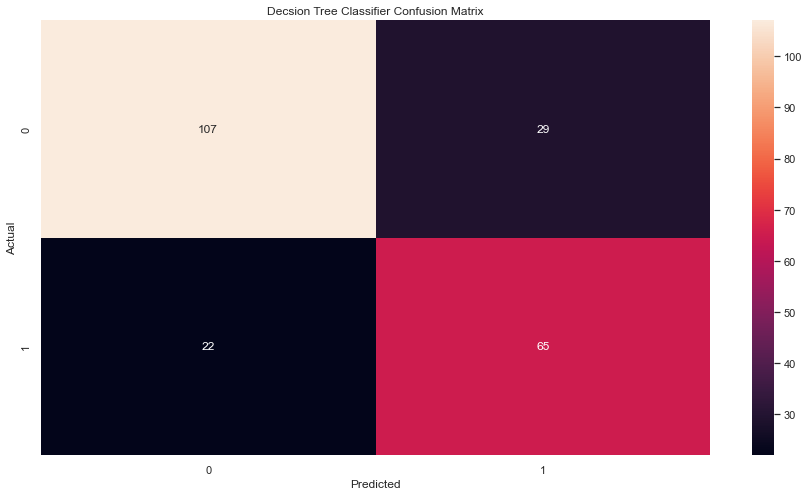

In [64]:
# Plot confusion matrix
plt.figure(figsize=(15, 8))
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title('Decsion Tree Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
# Classification Report:
cr_dt=classification_report(y_test,y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       136
           1       0.69      0.75      0.72        87

    accuracy                           0.77       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.77      0.77       223



In [66]:
# Dictionary to record model Evaluation score.
DT_clf_Eval= {'Classifier':'Decision Tree Classifier', 'Accuracy': Accuracy, 'Recall Score': recall , 'Precission': precision,'F1-Score':f1_score_dt}

In [67]:
# Appending Decsion Tree Evaluation Matrix in Evaluation Dataframe
Evaluation_df=Evaluation_df.append(DT_clf_Eval,ignore_index= True)
Evaluation_df.head()

,Classifier,Accuracy,Recall Score,Precission,F1-Score
0,Logestic Regression,0.838565,0.758621,0.814815,0.785714
1,Decision Tree Classifier,0.7713,0.747126,0.691489,0.718232


### 2.2.3 Random Forest Classifier:

In [68]:
# Training Random Forest Classifier Model.
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
# Make predictions
y_pred_rf = clf_rf.predict(X_test)

In [70]:
# Dataframe to compare 
df1_DT= pd.DataFrame({"Survived":y_test,"Survivied Prediction":y_pred_rf})
df1_DT.head(10)

,Survived,Survivied Prediction
374,0,0
212,0,0
259,1,1
584,0,0
508,0,0
264,0,1
804,1,0
887,1,1
410,0,0
494,0,0


In [71]:
# Calculating Evaluation Scores.
Accuracy = accuracy_score(y_test,y_pred_rf)
recall=recall_score(y_test,y_pred_rf)
precision=precision_score(y_test,y_pred_rf)
f1_score_rf= f1_score(y_test,y_pred_rf)
print("Accuracy Score: ",Accuracy)
print("Recall Score: ",recall)
print("Precison Score: ",precision)
print("F1 Score: ",f1_score_rf)

Accuracy Score:  0.820627802690583
Recall Score:  0.7471264367816092
Precison Score:  0.7831325301204819
F1 Score:  0.7647058823529411


In [72]:
# Calculating confusion Matrix
cm_rf=confusion_matrix(y_test,y_pred_rf)
print(cm_rf)

[[118  18]
 [ 22  65]]


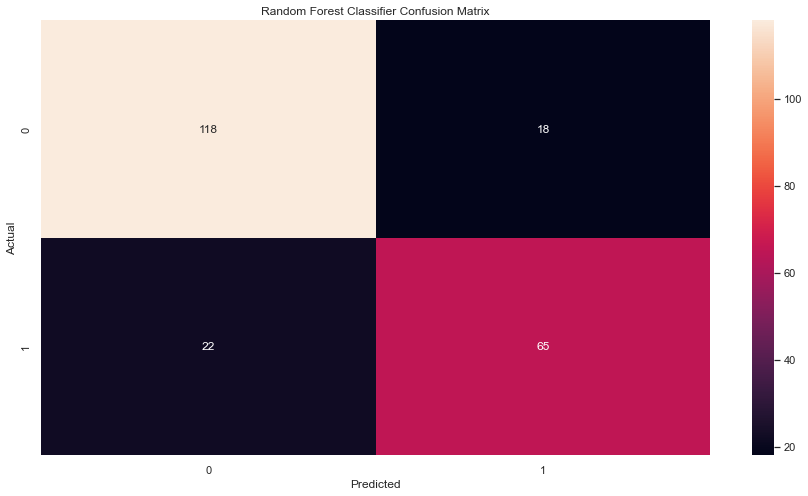

In [73]:
# Plot confusion matrix
plt.figure(figsize=(15, 8))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
# Classification Report:
cr_rf=classification_report(y_test,y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       136
           1       0.78      0.75      0.76        87

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



In [75]:
# Dictionary to record model Evaluation score.
RF_clf_Eval= {'Classifier':'Random Forest Classifier', 'Accuracy': Accuracy, 'Recall Score': recall , 'Precission': precision,'F1-Score':f1_score_rf}

In [76]:
# Appending model score in Evaluation Dataframe.
Evaluation_df=Evaluation_df.append(RF_clf_Eval,ignore_index= True)
Evaluation_df.head()

,Classifier,Accuracy,Recall Score,Precission,F1-Score
0,Logestic Regression,0.838565,0.758621,0.814815,0.785714
1,Decision Tree Classifier,0.7713,0.747126,0.691489,0.718232
2,Random Forest Classifier,0.820628,0.747126,0.783133,0.764706


### 2.2.4 Gradient Boost Classifier :

In [77]:
# Training Gradient Boost Training Model.
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [78]:
# Making Prediction.
y_pred_gb = gb_clf.predict(X_test)

In [79]:
# Comparring Test value and Predicted values.
df1_GB= pd.DataFrame({"Survived":y_test,"Survivied Prediction":y_pred_gb})
df1_GB.head(10)

,Survived,Survivied Prediction
374,0,1
212,0,0
259,1,1
584,0,0
508,0,0
264,0,1
804,1,0
887,1,1
410,0,0
494,0,0


In [80]:
# Calculating Evaluation Scores.
Accuracy = accuracy_score(y_test,y_pred_gb)
recall=recall_score(y_test,y_pred_gb)
precision=precision_score(y_test,y_pred_gb)
f1_score_gb= f1_score(y_test,y_pred_gb)
print("Accuracy Score: ",Accuracy)
print("Recall Score: ",recall)
print("Precison Score: ",precision)
print("F1 Score: ",f1_score_gb)

Accuracy Score:  0.852017937219731
Recall Score:  0.7586206896551724
Precison Score:  0.8461538461538461
F1 Score:  0.8


In [81]:
# Calculating confusion Matrix
cm_gb=confusion_matrix(y_test,y_pred_gb)
print(cm_gb)

[[124  12]
 [ 21  66]]


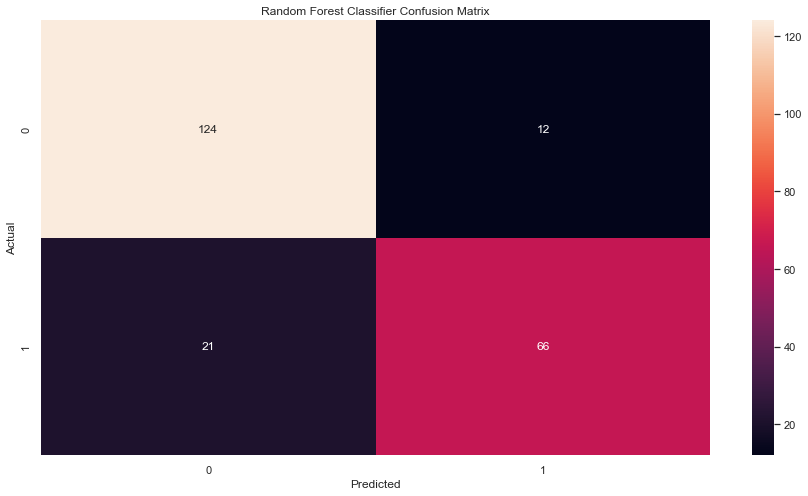

In [82]:
# Plot confusion matrix
plt.figure(figsize=(15, 8))
sns.heatmap(cm_gb, annot=True, fmt='d')
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [83]:
# Classification Report:
cr_gb=classification_report(y_test,y_pred_gb)
print(cr_gb)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       136
           1       0.85      0.76      0.80        87

    accuracy                           0.85       223
   macro avg       0.85      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223



In [84]:
# Dictionary to record model Evaluation score.
GB_clf_Eval= {'Classifier':'Gradient Boost Classifier', 'Accuracy': Accuracy, 'Recall Score': recall , 'Precission': precision,'F1-Score':f1_score_gb}

In [85]:
# Appending model score in Evaluation Dataframe.
Evaluation_df=Evaluation_df.append(GB_clf_Eval,ignore_index= True)
Evaluation_df.head()

,Classifier,Accuracy,Recall Score,Precission,F1-Score
0,Logestic Regression,0.838565,0.758621,0.814815,0.785714
1,Decision Tree Classifier,0.7713,0.747126,0.691489,0.718232
2,Random Forest Classifier,0.820628,0.747126,0.783133,0.764706
3,Gradient Boost Classifier,0.852018,0.758621,0.846154,0.8


### 2.2.5 Support Vector Machine Classifier : 

In [94]:
# Training Support Vector Machine Classifier Model.
sv_clf= SVC()
sv_clf.fit(X_train, y_train)

SVC()

In [95]:
# Making Prediction.
y_pred_svc = sv_clf.predict(X_test)

In [96]:
# Comparring Test value and Predicted values.
df1_SVC= pd.DataFrame({"Survived":y_test,"Survivied Prediction":y_pred_svc})
df1_SVC.head(10)

,Survived,Survivied Prediction
374,0,0
212,0,0
259,1,0
584,0,0
508,0,0
264,0,0
804,1,0
887,1,0
410,0,0
494,0,0


In [97]:
# Calculating Evaluation Scores.
Accuracy = accuracy_score(y_test,y_pred_svc)
recall=recall_score(y_test,y_pred_svc)
precision=precision_score(y_test,y_pred_svc)
f1_score_svc= f1_score(y_test,y_pred_svc)
print("Accuracy Score: ",Accuracy)
print("Recall Score: ",recall)
print("Precison Score: ",precision)
print("F1 Score: ",f1_score_svc)

Accuracy Score:  0.6636771300448431
Recall Score:  0.3218390804597701
Precison Score:  0.6363636363636364
F1 Score:  0.4274809160305344


In [99]:
# Calculating confusion Matrix
cm_svc=confusion_matrix(y_test,y_pred_svc)
print(cm_svc)

[[120  16]
 [ 59  28]]


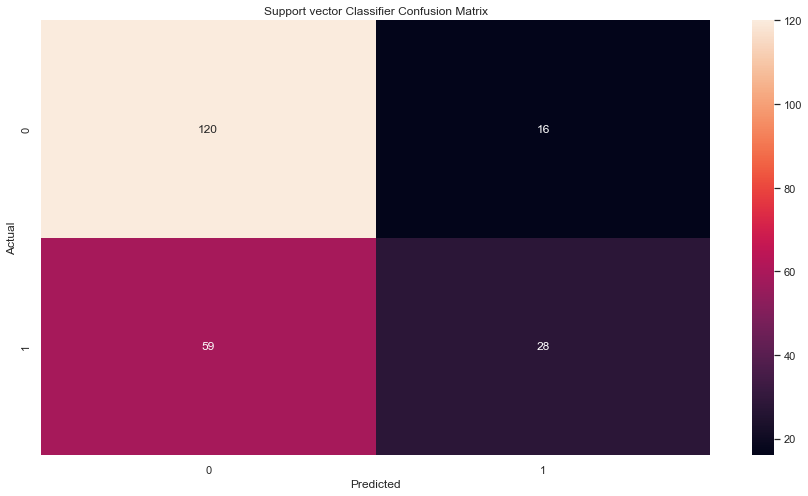

In [100]:
# Plot confusion matrix
plt.figure(figsize=(15, 8))
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.title('Support vector Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [101]:
# Classification Report:
cr_svc=classification_report(y_test,y_pred_svc)
print(cr_svc)

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       136
           1       0.64      0.32      0.43        87

    accuracy                           0.66       223
   macro avg       0.65      0.60      0.59       223
weighted avg       0.66      0.66      0.63       223



In [102]:
# Dictionary to record model Evaluation score.
RF_clf_Eval= {'Classifier':'Support vector Machine Classifier', 'Accuracy': Accuracy, 'Recall Score': recall , 'Precission': precision,'F1-Score':f1_score_svc}

In [104]:
# Appending model score in Evaluation Dataframe.
Evaluation_df=Evaluation_df.append(RF_clf_Eval,ignore_index= True)
Evaluation_df.head()

,Classifier,Accuracy,Recall Score,Precission,F1-Score
0,Logestic Regression,0.838565,0.758621,0.814815,0.785714
1,Decision Tree Classifier,0.7713,0.747126,0.691489,0.718232
2,Random Forest Classifier,0.820628,0.747126,0.783133,0.764706
3,Gradient Boost Classifier,0.852018,0.758621,0.846154,0.8
4,Support vector Machine Classifier,0.663677,0.321839,0.636364,0.427481


## 3. Model Evaluation and Selction : 

After training multiple machine learning models, we evaluated their performance using accuracy, recall, precision, and F1-Score. The results are as follows:

| Classifier                    | Accuracy | Recall Score | Precision | F1-Score |
|-------------------------------|----------|--------------|-----------|----------|
| Logistic Regression           | 0.838565 | 0.758621     | 0.814815  | 0.785714 |
| Decision Tree Classifier      | 0.771300 | 0.747126     | 0.691489  | 0.718232 |
| Random Forest Classifier      | 0.820628 | 0.747126     | 0.783133  | 0.764706 |
| Gradient Boost Classifier     | 0.852018 | 0.758621     | 0.846154  | 0.800000 |
| Support Vector Machine Classifier | 0.663677 | 0.321839     | 0.636364  | 0.427481 |


### Best Model: Gradient Boost Classifier

The Gradient Boost Classifier emerged as the best model based on the following reasons:
- **Accuracy**: Highest at 0.852018.
- **Precision**: Highest at 0.846154.
- **Recall**: Tied for the highest at 0.758621.
- **F1-Score**: Highest at 0.800000.


### Detailed Analysis :
- **Logistic Regression :** Although it achieves high accuracy (0.838565) and a respectable F1-Score (0.785714), it slightly lags behind the Gradient Boost Classifier in terms of precision and the overall balance between precision and recall.
- **Decision Tree Classifier :** This model has the lowest accuracy among the leading models (0.771300), with reduced precision (0.691489) and a lower F1-Score (0.718232), suggesting it is less reliable compared to the Gradient Boost and Logistic Regression models.
- **Random Forest Classifier :** Achieving an accuracy of 0.820628 and an F1-Score of 0.764706, this model performs quite well but does not exceed the Gradient Boost Classifier in terms of overall performance metrics.
- **Support Vector Machine Classifier :** This model has the lowest accuracy (0.663677) and F1-Score (0.427481) among all, indicating it's not well-suited for this particular task with the given dataset.


**These metrics indicate that the Gradient Boost Classifier provides the best balance between identifying true positives and minimizing false positives, making it the most reliable model for predicting Titanic passenger survival.**


## 4. Conclusion :

**In this project, we successfully developed and assessed various machine learning models to predict Titanic passenger survival. The Gradient Boost Classifier was chosen as the best model due to its exceptional performance across several evaluation metrics.**

Potential future improvements could include:
- Investigating further feature engineering approaches to enhance model performance.
- Optimizing hyperparameters for the Gradient Boosting Classifier to achieve better results.
- Evaluating other sophisticated algorithms and ensemble methods to compare performance.
- Exploring dimensionality reduction methods to potentially improve model efficiency and reduce overfitting.